In [2]:
### Load libraries and load 2018 data

In [3]:
library(sqldf)
library(tidyverse)
library(lubridate)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [4]:
airq<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_Mar_PM25_2561.csv")

In [5]:
airq2<-read.csv("https://raw.githubusercontent.com/Maplub/AirQualityData/master/H_PM25_Apr_2561.csv")

In [6]:
airq<-rbind(airq,airq2)

In [7]:
airq<-airq[(airq$pm25<1000),]

In [8]:
head(airq)

sensorid,date,h,pm25
CU-S0002,2018-03-01,9,43.06250
CU-S0002,2018-03-01,10,45.21875
CU-S0002,2018-03-01,11,48.02083
CU-S0002,2018-03-01,12,46.94792
CU-S0002,2018-03-01,13,44.92708
CU-S0002,2018-03-01,14,45.35417


In [9]:
airq$date<-as.Date(airq$date,format="%Y-%m-%d")

### Get hourly average

In [10]:
hourlyairq<-aggregate(airq["pm25"], by=airq[c("sensorid","date","h")], FUN=mean,na.rm=TRUE)

In [11]:
hourlyairq$datehr<-paste(hourlyairq$date,sprintf("%02d", hourlyairq$h),sep = " ")
hourlyairq$datehr<-paste(hourlyairq$datehr,":00:00",sep="")
hourlyairq$datehr<-as.POSIXct(strptime(hourlyairq$datehr,format="%Y-%m-%d %H:%M:%S"))

In [12]:
#write.csv(hourlyairq,"hourlyMarch.csv")

In [13]:
hourlyairq_s<-hourlyairq[hourlyairq$date >'2018-03-31',]
#hourlyairq_s<-hourlyairq[hourlyairq$date <= '2018-03-31',]

In [14]:
hourly<-sqldf("select sensorid,h,avg(pm25) as pm25 from hourlyairq_s group by h,sensorid")

Hourly data of PM2.5 in March of all stations shows two peaks within a day with high peak in the morning (around 9:00), and another peak around 20:00- 21:00. The result is similar to (Li, 2019) in China.

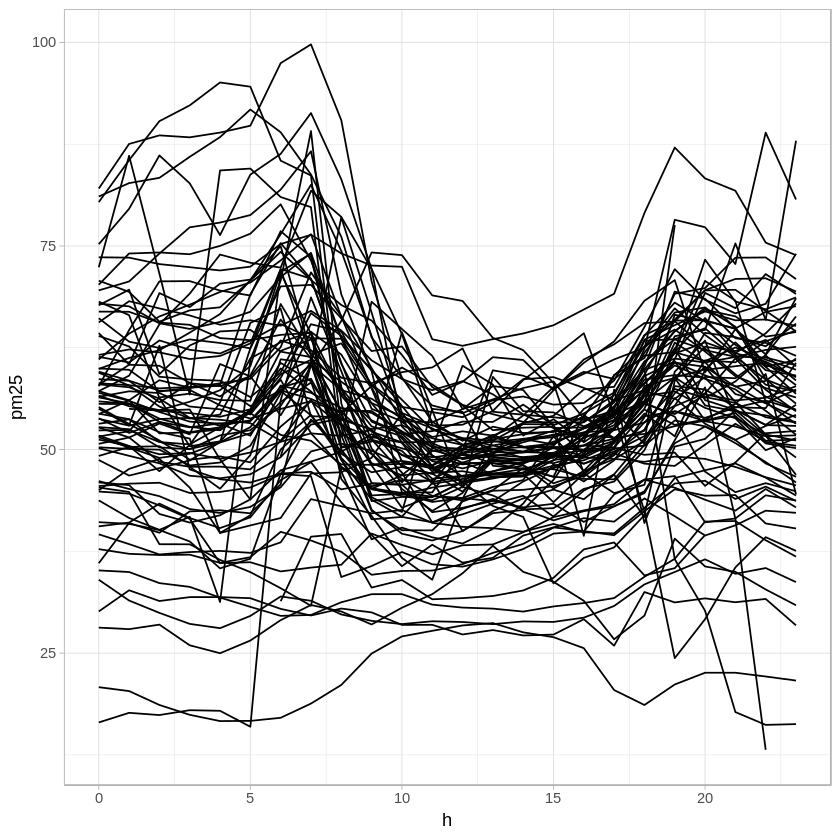

In [15]:
ggplot(data=hourly, aes(x=h, y=pm25, group=sensorid)) + geom_line()+theme_light()

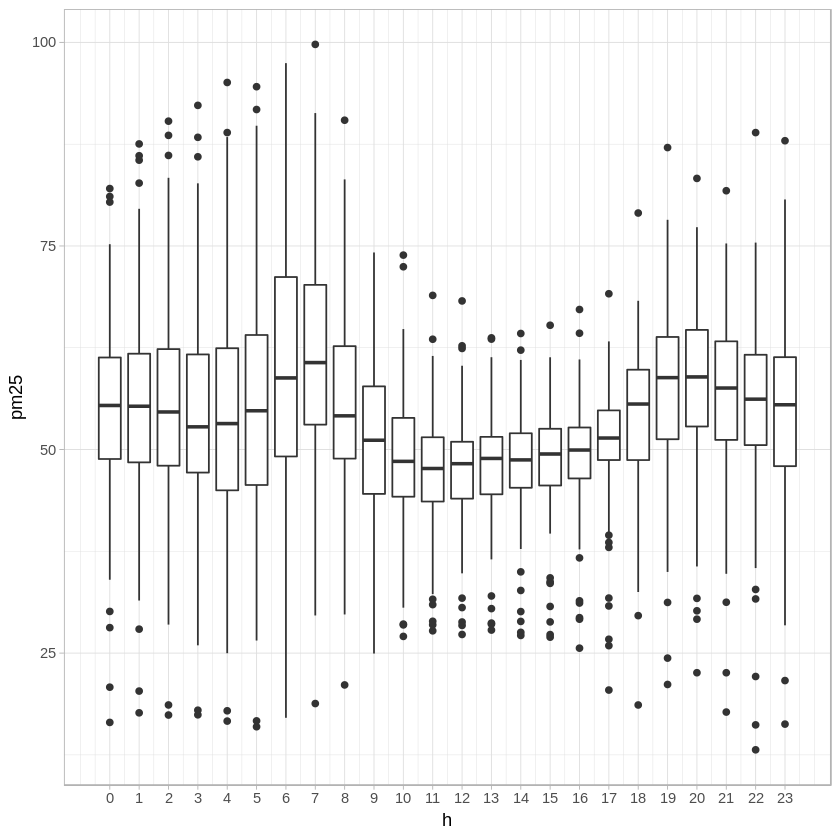

In [16]:
ggplot(data=hourly, aes(x=h, y=pm25, group=h)) + geom_boxplot() + scale_x_continuous(breaks=seq(from=0,to=23))+theme_light()

## Seasonal Decomposition

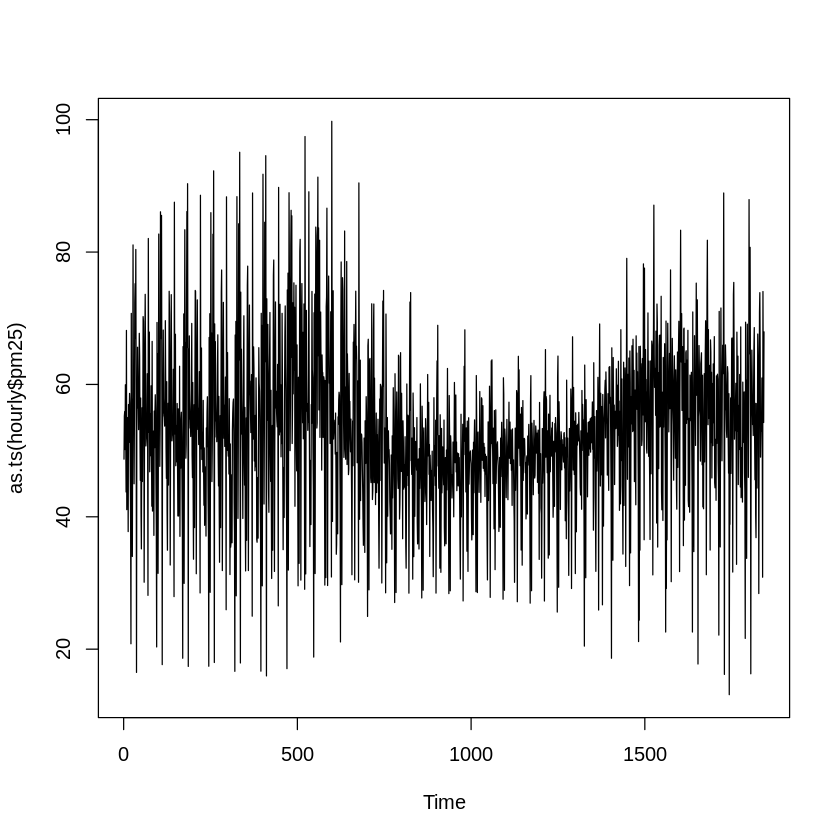

In [19]:
plot(as.ts(hourly$pm25))